## Lab #1 - Modeling Gravitational Fields

### PHYS 164

***

Fields are one of the most useful inventions of modern physics.  Traditionally, we can think of two objects exerting a gravitational force on each other given by:

$$ \vec{F}_{\rm G} = - \frac{G m_1 m_2}{r^2} \hat{r}$$

where $G = 6.67 \times 10^{-11}~\mbox{N} \cdot \mbox{m}^2/\mbox{kg}^2$, and $\hat{r} = \vec{R}/r$ is a unit vector that points from one mass to another.

With a field, we can think of one (or more) masses as creating a gravitational field $\vec{g}$.  Another mass will then respond to the field, and experience a force given by $\vec{F} = m \vec{g}$.  Note that the field exists independent of any other masses, and thus we can describe the field due to a single mass on its own.

From the above equation, it should be obvious that the field due to a single point mass is given by:

$$ \vec{g} = - \frac{G m}{r^2} \hat{r} $$

In this lab, we will calculate the gravitational field due to two point masses.  Note that gravitational fields are subject to superposition (like forces), so $\vec{g}_{\rm net} = \vec{g}_1 + \vec{g}_2$.  We will also plot the gravitational field, showing its magnitdue and direction at any point in space.

***

#### Field from a point mass

Imagine a single point mass, located at a point $\vec{P}_{\rm A} = (x_{\rm A}, y_{\rm A})$.  We wish to find the gravitational field at point $\vec{P}_{\rm B} = (x_{\rm B}, y_{\rm B})$.  The vector $\hat{r}$ can be found using the $R-r$ method:

* find $\vec{R} = \vec{P}_{\rm B} - \vec{P}_{\rm A} = (x_{\rm B} - x_{\rm A}, y_{\rm B} - y_{\rm A})$

* find $r = |\vec{R}|$

* find $\hat{r} = \frac{\vec{R}}{r}$

From all of the above, we see that we can also write the gravitational field as:

$$ \vec{g} = - \frac{Gm}{r^3} \vec{R} $$

If we want to find the field at a given point in space, we first need to find the displacement vector $R$ that points from the mass to our point of interest, then find the magnitude of that vector $r$, and plug them both into the above equation.

Let's say we have a point mass of 3 kg located at $(x,y) = (1,2)$ and we want to find the gravitational field anywhere.  We can use a function to calculate the field at a given point in space.  Additionally, we can use an array with 2 elements to hold the x- and y-coordinates of the mass and our point of interest.

In [1]:
import numpy as np

def gfield(x,y):                  # Create a function that takes x and y coordinates as input
    m = 3                         # Define the mass (3 kg)
    G = 6.67e-11                  # Newton's universal constant of gravitation
    pa = np.array([1,2])          # Create a numpy array with the x and y coordinates of our mass

    Rx = x-pa[0]                  # Find a position vector that points from the mass to our point of interest
    Ry = y-pa[1]
    
    r = np.hypot(Rx,Ry)           # Use the numpy hypotenuse function to find the magnitude of R

    r = np.where(r<0.1,np.nan,r)  # The field will blow up to infinity near our point mass.  So if r < 0.1, we will
                                  # replace the distance with 'nan' (not a number), which means the field won't be computed
    
    gx = -G*m*Rx/r**3             # Calculate the value of each component of g
    gy = -G*m*Ry/r**3
    return np.array([gx,gy])      # Return the components as an array to whatever called it

Let's try finding the field at a few points:

In [2]:
gfield(2,3)

array([-7.07460335e-11, -7.07460335e-11])

In [3]:
gfield(5,-3)

array([-3.04881656e-12,  3.81102070e-12])

The field is pretty small (not surprising) and gets weaker as we move farther away (as expected).

***

#### Plotting the field

We can calculate field values all day, but what if we want to visualize what the field looks like?  `Matplotlib`, the plotting library, contains a function called `streamplot` that will show us a vector field.  Let's try plotting the field we created above.

First we need to import `matplotlib`, then create a grid of points where we will calculate and plot the field.

In [4]:
import matplotlib.pyplot as plt

x = np.arange(-5,5,0.1)    # Creates an array from -5 to +5, in steps of 0.1.
y = np.arange(-5,5,0.1)    # You can make the steps larger/smaller if you want more streamlines

X,Y = np.meshgrid(x,y)      # Create a mesh grid of all the points

Now we can use our `streamplot` function to make the plot.  It takes a minimum of four inputs:  our grids for X and Y coordinates, a function to describe the x-component of the field, and then a function for the y-component of the field.

Before we make the plot, we can use our function from above to calculate the gravitational field at each of our grid points.

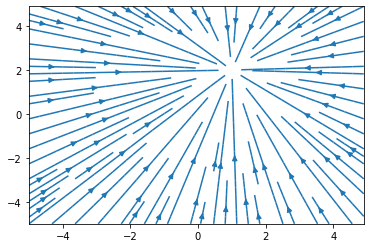

In [5]:
gX,gY = gfield(X,Y)

plt.streamplot(X,Y,gX,gY)
plt.show()

As expected, the field lines point directly in towards our mass at $(x,y) = (1,2)$.  We can also change the color of the lines, to help us see the changing magnitude of the field.  Let's use the magnitude of the field to scale the color.

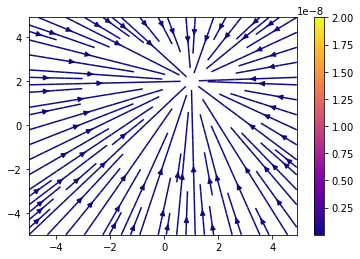

In [6]:
plt.streamplot(X,Y,gX,gY,color=np.hypot(gX,gY),cmap='plasma')
plt.colorbar()
plt.show()

The colors don't change much because the field is relatively uniform near our mass.  However if we add additional masses, changes will be much more apparent.  To help us out, instead let's use the logarithm of the field strength (which should help flatten out any huge increases).  We can also add labels to our plot, and put a dot where the mass is.  We can also change the density of the lines.

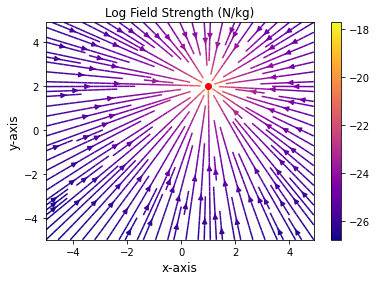

In [7]:
plt.streamplot(X,Y,gX,gY,color=np.log(np.hypot(gX,gY)),cmap='plasma',density=1.5)
plt.colorbar()
plt.xlabel('x-axis',size='large')
plt.ylabel('y-axis',size='large')
plt.title('Log Field Strength (N/kg)')
plt.plot(1,2,'ro')  # Plot a single point at (1,2).  The 'bo' gives us a red dot
plt.show()

Now that's a nice looking vector field!

***

### To be submitted with your writeup:

* A method to calculate the gravitational field from **two** point masses:  a 5 kg mass located at (x,y) = (2,3), and a 10 kg mass located at (x,y) = (-1,1).  Make sure to describe what you are doing, and comment your code so that I can understand it.

* A plot, similar to the one above, showing the field from both masses in the interval (-5,5) for both x and y axes.  Note any interesting features that you see in your plot.

* If time, try adding a third mass at (x,y) = (3,-1) with a mass of 5 kg.  Update your plot above.

* A description of how your notebook would change if we were calculating the **electric** field instead of the gravitational field.  Note that you don't actually have to make the changes, just describe what *would* change.